In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

/home/masse/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# 147 EN_L2_3_IT
# 156 all neurons, reptile, SGD, long run
# 161 all neurons, ADAM, 20 epochs, starts strong then accuracy decays
# 163 all neurons, SGD, 40 epochs, slow, but progressing
# 164 all neurons, Adam first 3 epochs, SGD after, ~80 epochs, good but not SOTA
# 166, 167, 168 EN_L2_3_IT, Adam, starts strong then accuracy decays
# 170 EN_L2_3_IT, Reptile
# 171, 172 Micro, Reptile
# 173 all neurons, ADAM with lower eps, beta, starts strong then accuracy decays

In [68]:
# 90 drop 0.25, batch subclass all
# 91 drop 0.0, batch subclass all
# 93 drop 0.5, latent 16, batch subclass all

# 94, EN, drop 0.5, latent 16, batch subclass all
# 95, Astro, drop 0.5, latent 16, batch subclass all
# 96, Immune, drop 0.5, latent 16, batch subclass all
# 97, IN, drop 0.5, latent 16, batch subclass all

# 98, EN, drop 0.5, latent 16, no batch properties
# 99, Astro, drop 0.5, latent 16, no batch properties
# 101, OPC, drop 0.5, latent 16, no batch properties
# 102, Oligo, drop 0.5, latent 16, no batch properties
# 103, Mural, drop 0.5, latent 16, no batch properties
# 104, Endo, drop 0.5, latent 16, no batch properties
# 105, Immune, drop 0.5, latent 16, no batch properties
# 106, OPC (long run), drop 0.5, latent 16, no batch properties
# 107, Astro (long run), drop 0.5, latent 16, no batch properties
# 109, EN, drop 0.5, latent 32, no batch properties
# 110, EN, KL warmup 10, drop 0.5, latent 32, no batch properties
# 113, Astro latent not constrained, drop 0.5, latent 32, no batch properties

# Latent 32, not constrained, CERAD/Braak centered at 0, Drop 0.5
# 114, Astro
# 115, OPC


# Latent 32, not constrained, CERAD/Braak centered at 0, Drop 0.5, GELU
# 120, Astro
# 122, OPC



v0 = 0
fn = f"/home/masse/work/vae/lightning_logs/version_{v0}/metrics.csv"
x0 = pd.read_csv(fn)

v1 = 0
fn = f"/home/masse/work/vae/lightning_logs/version_{v1}/metrics.csv"
x1 = pd.read_csv(fn)


fn = f"/home/masse/work/vae/lightning_logs/version_{v1}/test_results.pkl"
z = pickle.load(open(fn, "rb"))
"""
v_num = 156
fn = f"/home/masse/work/perceiver/lightning_logs/version_{v_num}/metrics.csv"
x0 = pd.read_csv(fn)
v_num = 166
fn = f"/home/masse/work/perceiver/lightning_logs/version_{v_num}/metrics.csv"
x1 = pd.read_csv(fn)
#fn = f"/home/masse/work/perceiver/lightning_logs/version_{v_num}/test_results.pkl"
#z = pickle.load(open(fn, "rb"))
"""

'\nv_num = 156\nfn = f"/home/masse/work/perceiver/lightning_logs/version_{v_num}/metrics.csv"\nx0 = pd.read_csv(fn)\nv_num = 166\nfn = f"/home/masse/work/perceiver/lightning_logs/version_{v_num}/metrics.csv"\nx1 = pd.read_csv(fn)\n#fn = f"/home/masse/work/perceiver/lightning_logs/version_{v_num}/test_results.pkl"\n#z = pickle.load(open(fn, "rb"))\n'

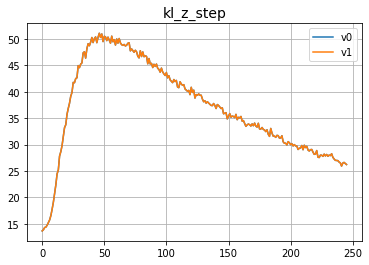

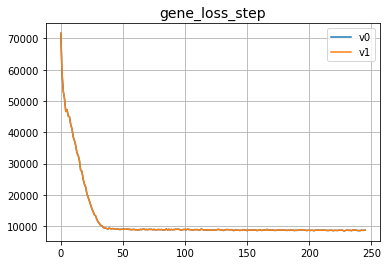

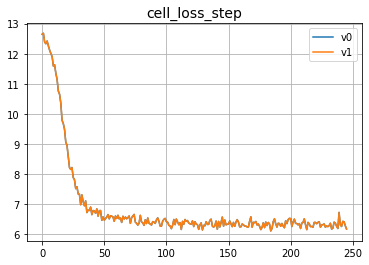

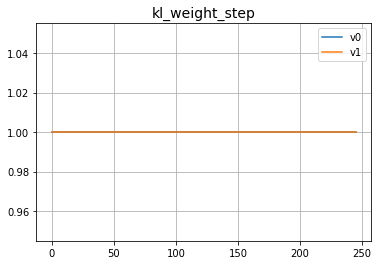

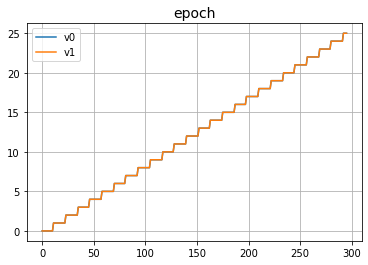

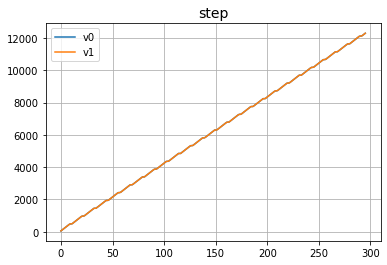

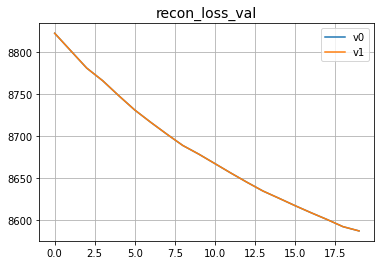

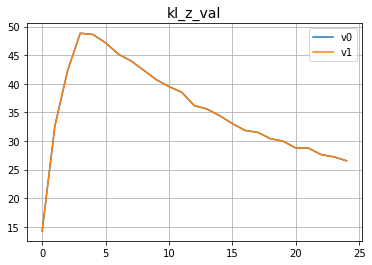

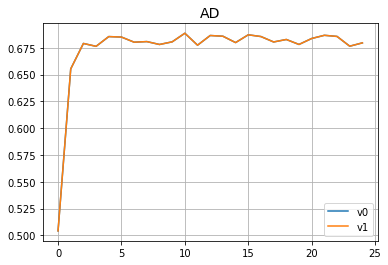

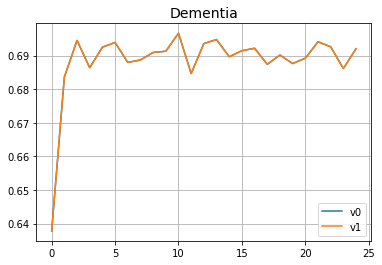

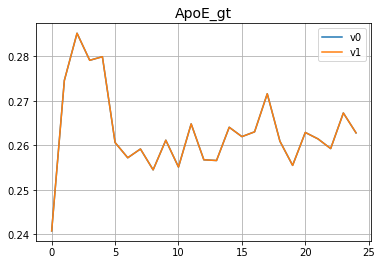

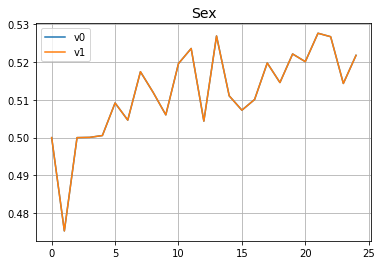

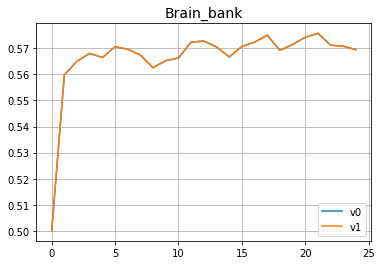

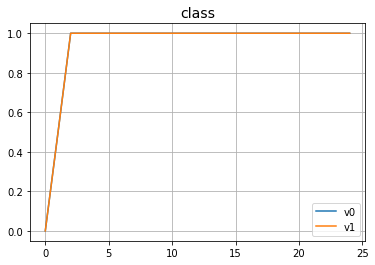

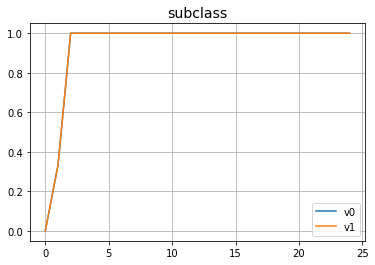

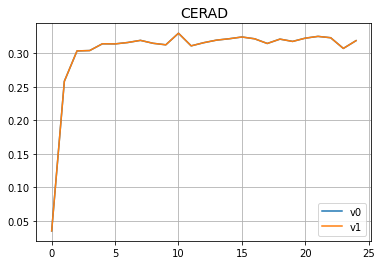

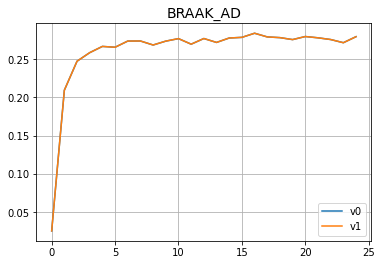

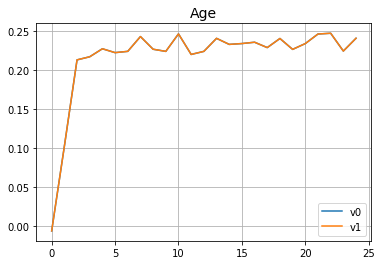

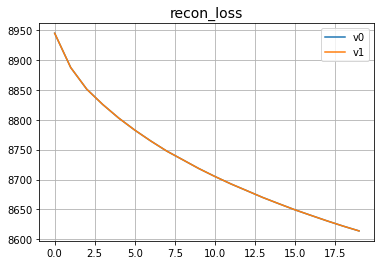

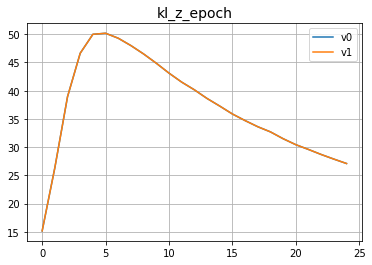

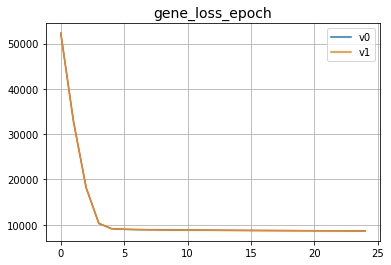

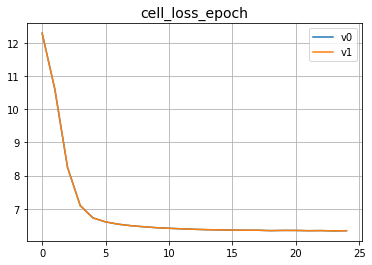

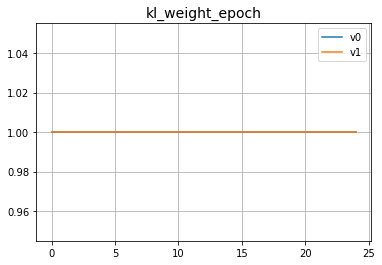

In [69]:
log_vars = ["kl_z_step", "kl_z_epoch", "kl_z_val"]


for k in x0.keys():
    xa = x0[k].values
    xa = xa[~np.isnan(xa)]
    
    xb = x1[k].values
    xb = xb[~np.isnan(xb)]
    
    if "recon_loss" in k:
        xa = xa[5:]
        xb = xb[5:]
    if len(xb) < 20:
        print(xb)

    plt.plot(xa, label="v0")
    plt.plot(xb, label="v1")
    plt.title(k, fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

In [9]:
def convert(x, k, dim):
    print(k, x["pred_"+k].shape)

    x0 = np.reshape(x[k], (-1,))
    idx = np.where((x0 >= -99))[0]
    x0 = x0[idx]
    

    print(k, x["pred_"+k].ndim, x["pred_"+ k].shape)

    if x["pred_"+k].ndim > 2:
        x1 = np.reshape(x["pred_"+k], (-1, x["pred_"+k].shape[-1]))
        x1 = x1[idx, :]
        un0 = np.arange(dim)
    else:
        x1 = np.reshape(x["pred_"+k], (-1,))
        x1 = x1[idx]
        un0 = np.unique(x0)
        un0 = un0[np.abs(un0) > 0] 
        
        
    if k == "BRAAK_AD":
        print(un0)

    s = np.zeros((dim, dim))
    for y0, y1 in zip(x0, x1):
        #p = softmax(y1)
        #s[y0, :] += p
        # i0 = np.where(y0 == un0)[0]
        if x["pred_" + k].ndim > 2:
            i1 = np.where(np.argmax(y1) == un0)[0]
            j = y0
        else:
            i1 = np.argmin(np.abs(un0 - y1))
            j = np.argmin(np.abs(un0 - y0))

        s[j, i1] += 1.0
    #s /= (1e-9 + np.sum(s, axis=1, keepdims=True))
    return s, len(x0)

AD (500, 1024, 2)
AD 3 (500, 1024, 2)
Dementia (500, 1024, 2)
Dementia 3 (500, 1024, 2)
BRAAK_AD (500, 1024)
BRAAK_AD 2 (500, 1024)
[-1.6509256  -1.1769435  -0.7029615  -0.2289795   0.24500254  0.71898454
  1.1929666 ]
CERAD (500, 1024)
CERAD 2 (500, 1024)


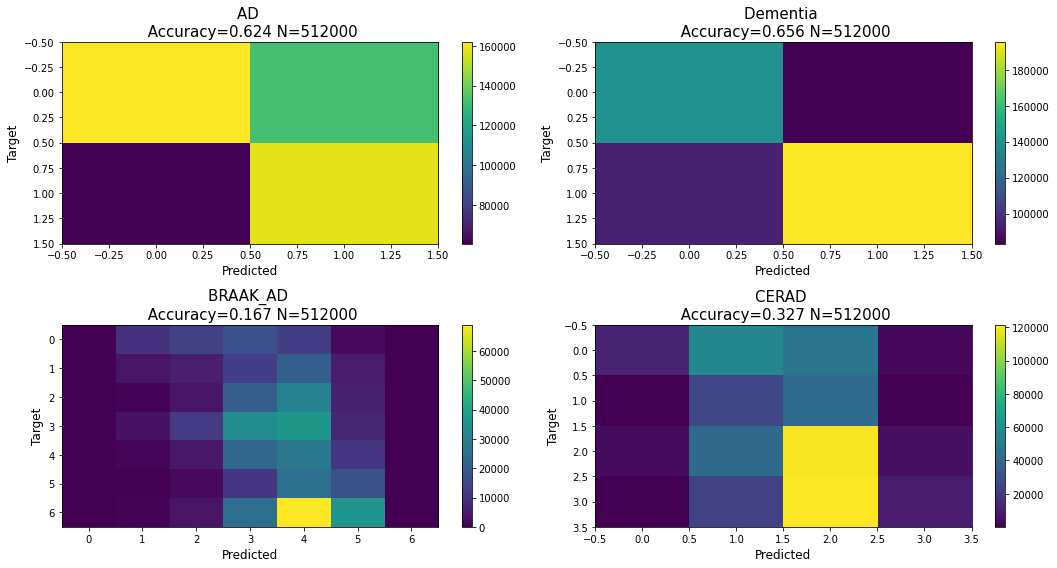

In [148]:
targets = {"AD": 2, "Dementia": 2, "BRAAK_AD": 7, "CERAD": 4}

f, axs = plt.subplots(2, 2, figsize=(15, 8))

for n, k in enumerate(targets.keys()):
    s, n_samples = convert(z, k, targets[k])
    acc = np.sum(np.diag(s)) / np.sum(s)
    ax = axs[n // 2, n % 2]
    pcm = ax.imshow(s, aspect="auto")
    f.colorbar(pcm, ax=ax)
    ax.set_ylabel("Target", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_title(f"{k} \n Accuracy={acc:1.3f} N={n_samples}", fontsize=15)

plt.tight_layout()
plt.show()

In [120]:
z["AD"].shape

(500, 1024)

In [308]:
len(z["latent"])

203

In [311]:
latent = np.stack(z["latent"])
latent = np.reshape(latent, (-1, 32))
ad = np.reshape(z["AD"], (-1))
cerad = np.reshape(z["CERAD"], (-1))

In [324]:
un = np.unique(cerad)
un = un[np.abs(un) > 0]

16909
23971


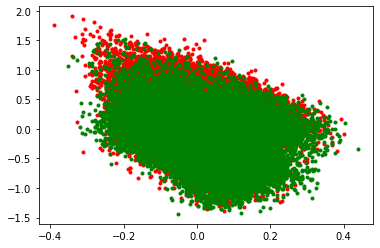

In [335]:
c = ['b', 'r', 'g', 'k']
for i in range(1, 3):
    idx = cerad==un[i]
    print(np.sum(idx))
    plt.plot(latent[idx, 0], latent[idx, 1], '.', color=c[i])
plt.show()

In [183]:
z.keys()

dict_keys(['epoch', 'AD', 'pred_AD', 'class_id', 'latent', 'target_gene_vals', 'px_r', 'px_rate'])

<ipython-input-192-9bac9878041b>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(z["target_gene_vals"][0, :]), np.log(z["px_rate"][0, :]), 'k.')


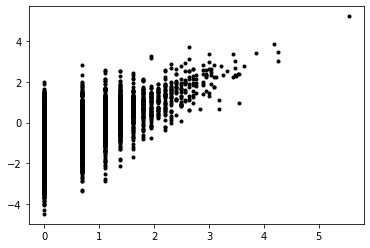

In [192]:
plt.plot(np.log(z["target_gene_vals"][0, :]), np.log(z["px_rate"][0, :]), 'k.')
plt.show()

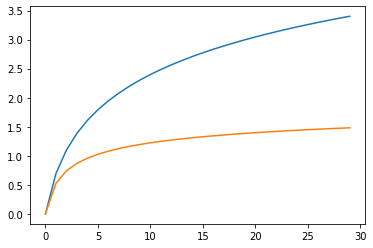

In [184]:
plt.plot(np.log1p(np.arange(30)))
plt.plot(np.log1p(np.log1p(np.arange(30))))
plt.show()

In [185]:
print(np.log1p(np.log1p(np.arange(50))))

[0.         0.52658903 0.74127631 0.86974169 0.95913484 1.02667203
 1.08041782 1.12474826 1.16228311 1.19470552 1.2231562  1.24844126
 1.27114985 1.29172467 1.31050619 1.32776143 1.34370344 1.35850472
 1.37230673 1.38522686 1.39736348 1.40879982 1.41960684 1.42984555
 1.4395687  1.44882224 1.45764638 1.46607654 1.47414401 1.48187664
 1.48929923 1.49643402 1.503301   1.5099182  1.51630194 1.52246703
 1.52842695 1.53419401 1.53977946 1.54519363 1.55044602 1.55554537
 1.56049976 1.56531666 1.57000297 1.57456514 1.57900914 1.58334052
 1.58756448 1.59168587]


In [44]:
3.5*2.54

8.89

In [45]:
7.75*2.54

19.685